#INSTRUCTIONS



###How to enable GPU in google colab (faster training)

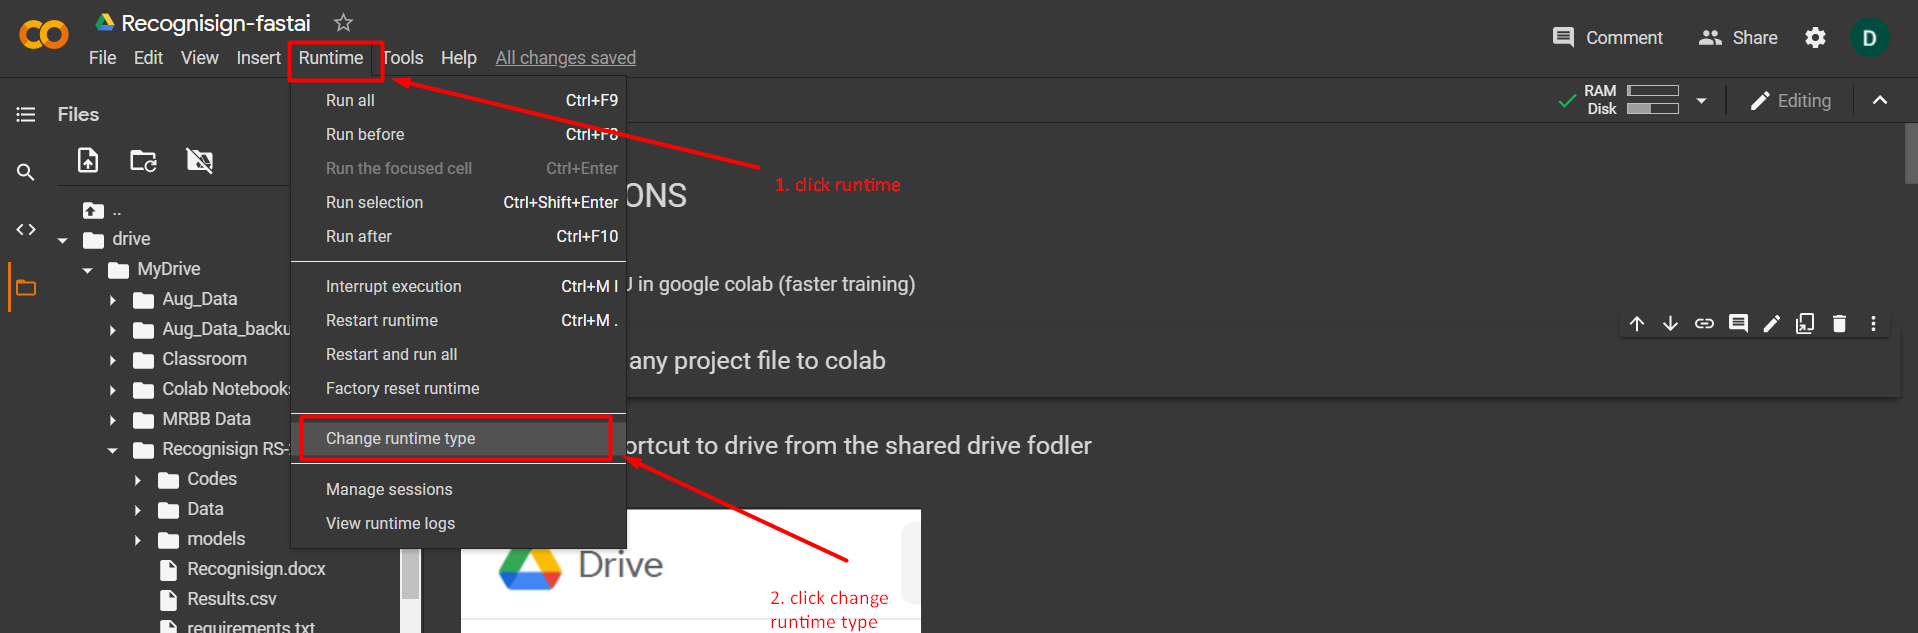

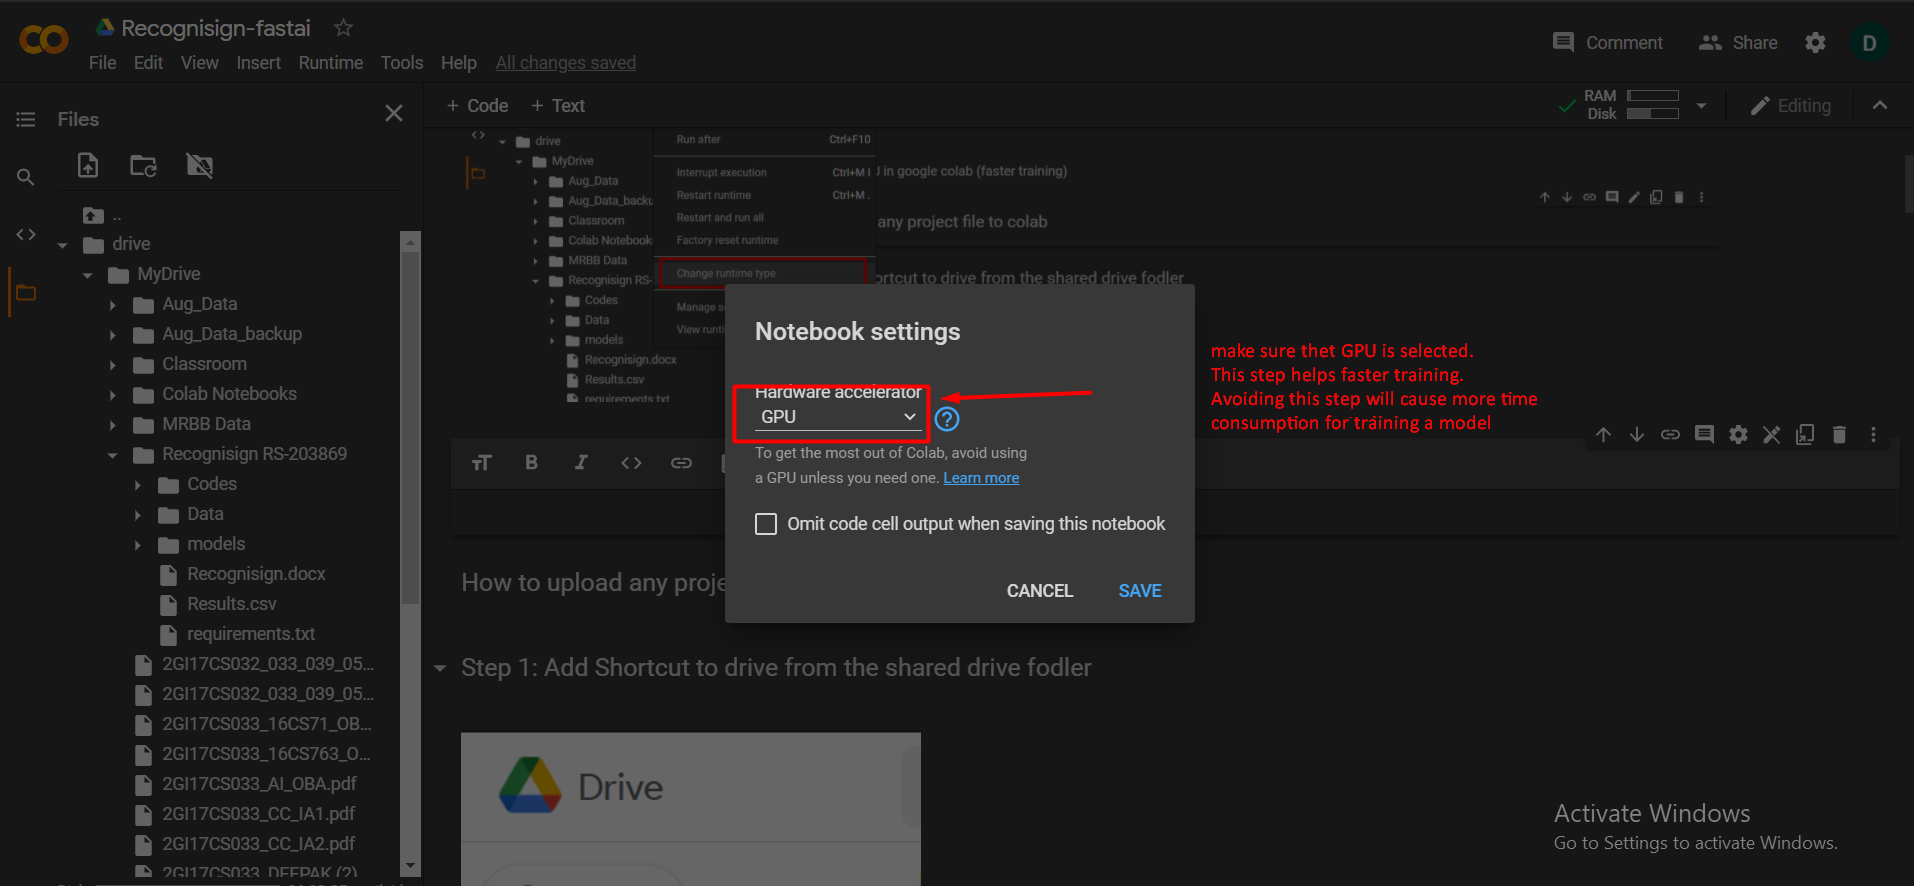


### How to upload any project file to colab

###Step 1: Add Shortcut to drive from the shared drive fodler

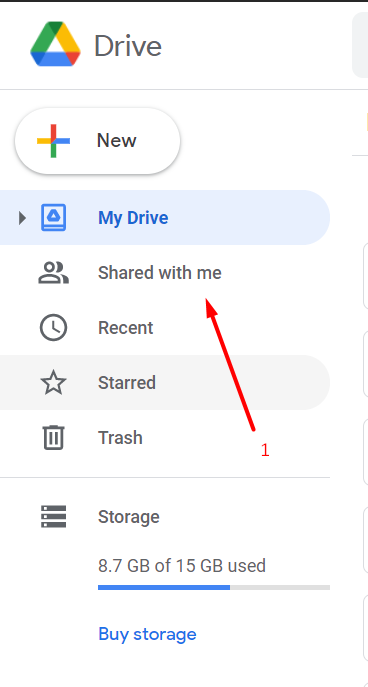

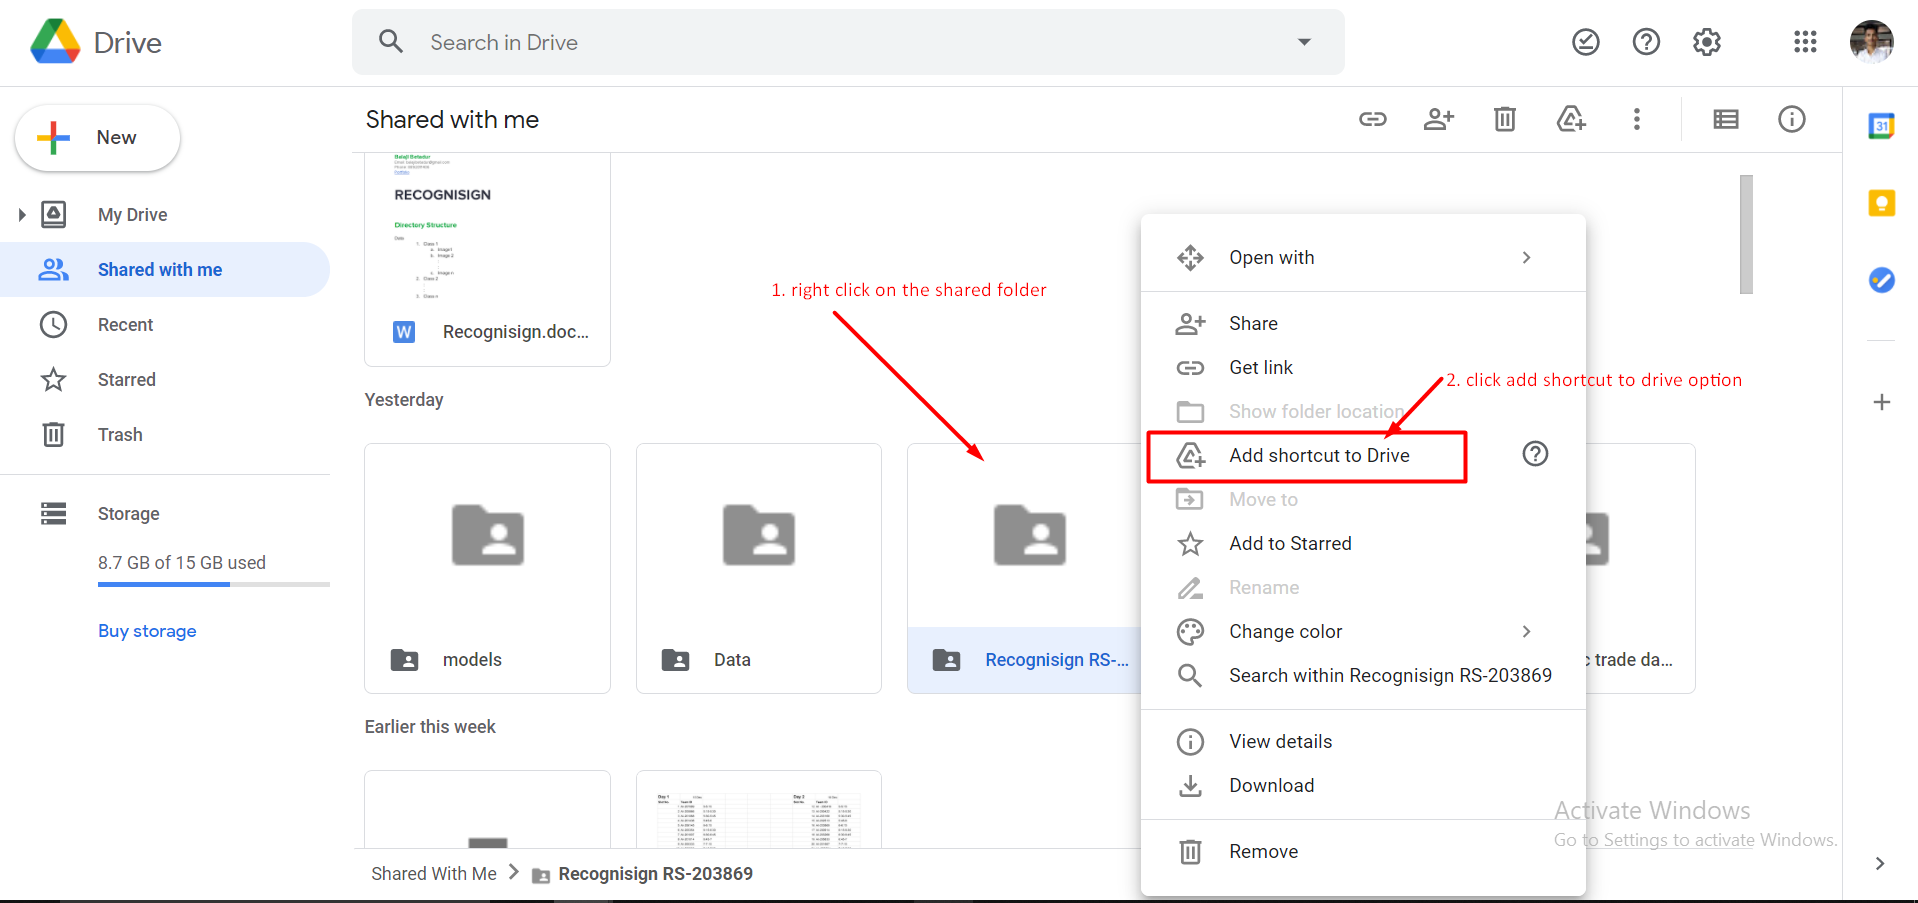

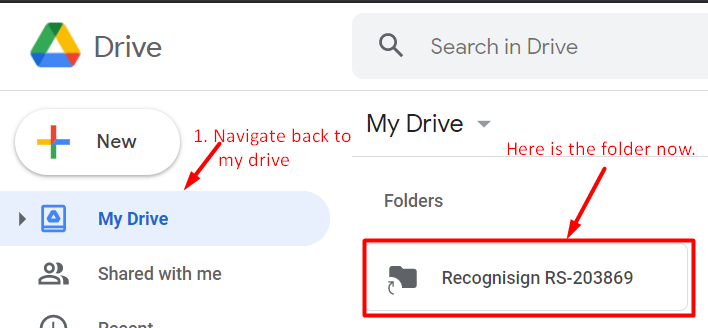

###Step 2: Mount your drive on collab notebook

In [ ]:
# run this code and click on the link.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Run the above code. Once you run this you will get a link to authenticate from google (refer below images).

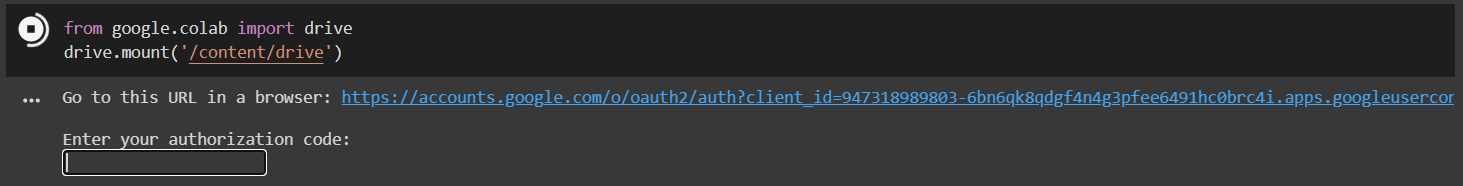

Once you click on the link you will be redirected to the google accounts page. Selct the account wher the project folder is present.

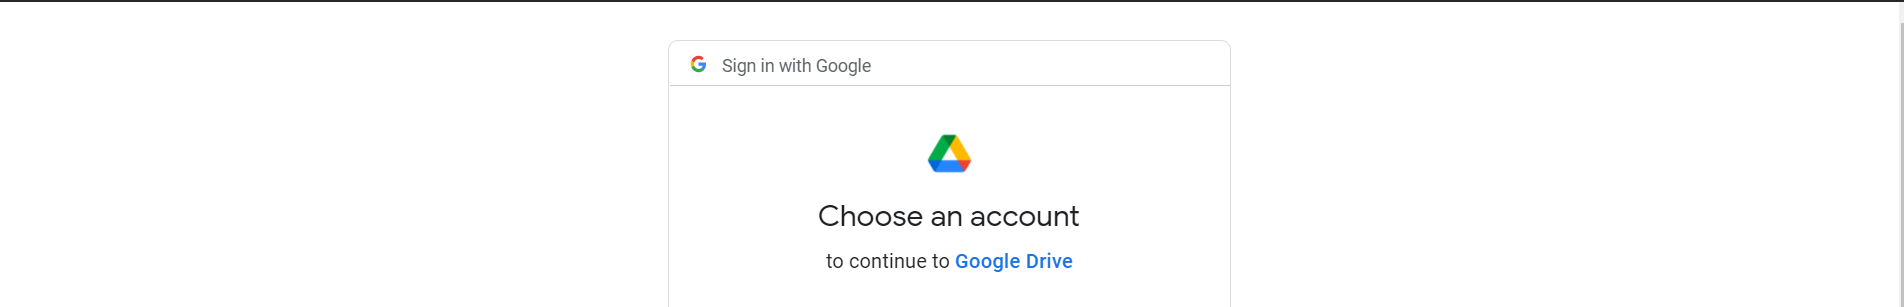

Then click allow in the next redirected page

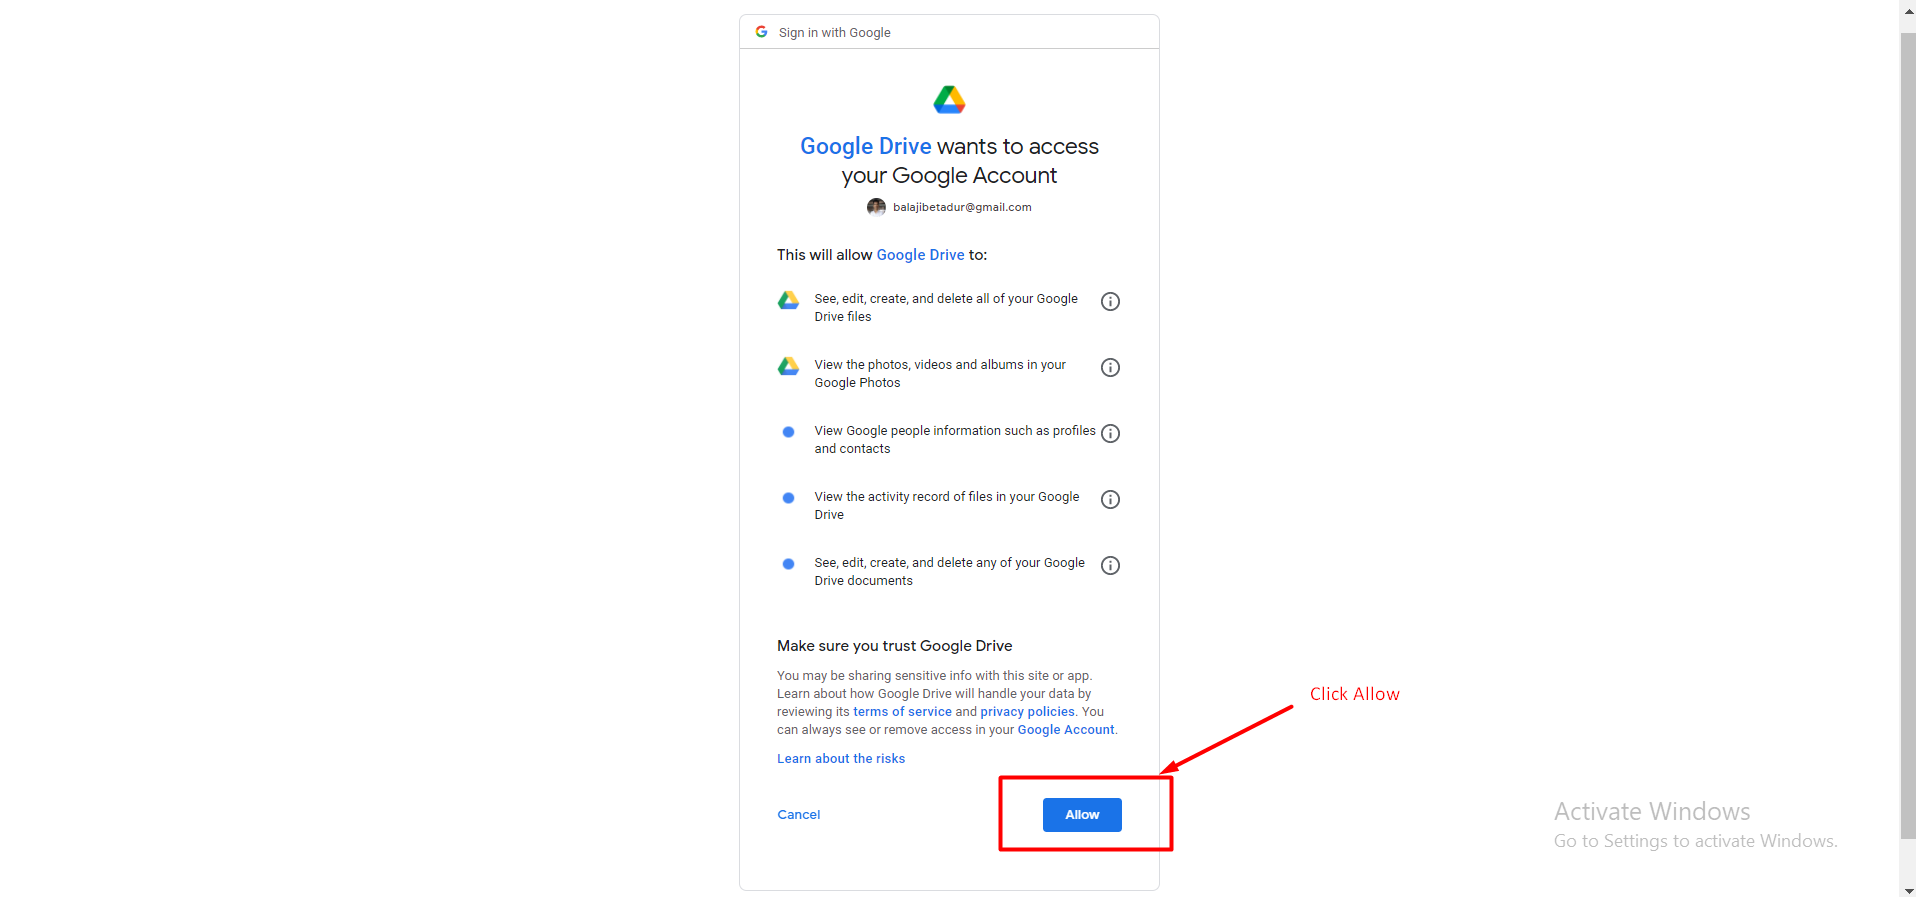

Then you will get a key for authentication, copy the key.

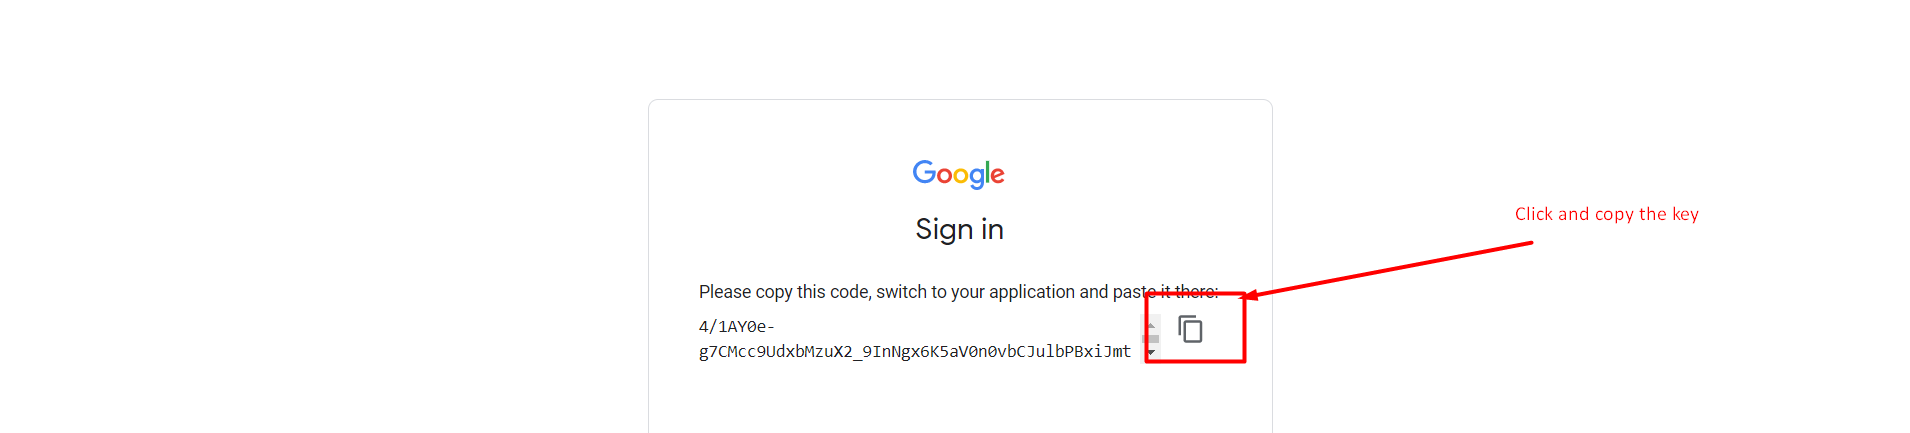

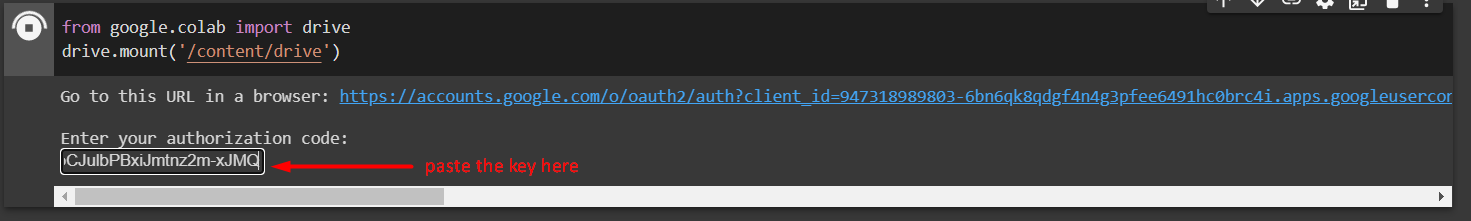

#Hurray!!! Your drive is mounted now

#Step 3: Add base path

###In order to fetch data model and other files from the fodler we need to specefy the base folder path

How to copy path of the file in colab??

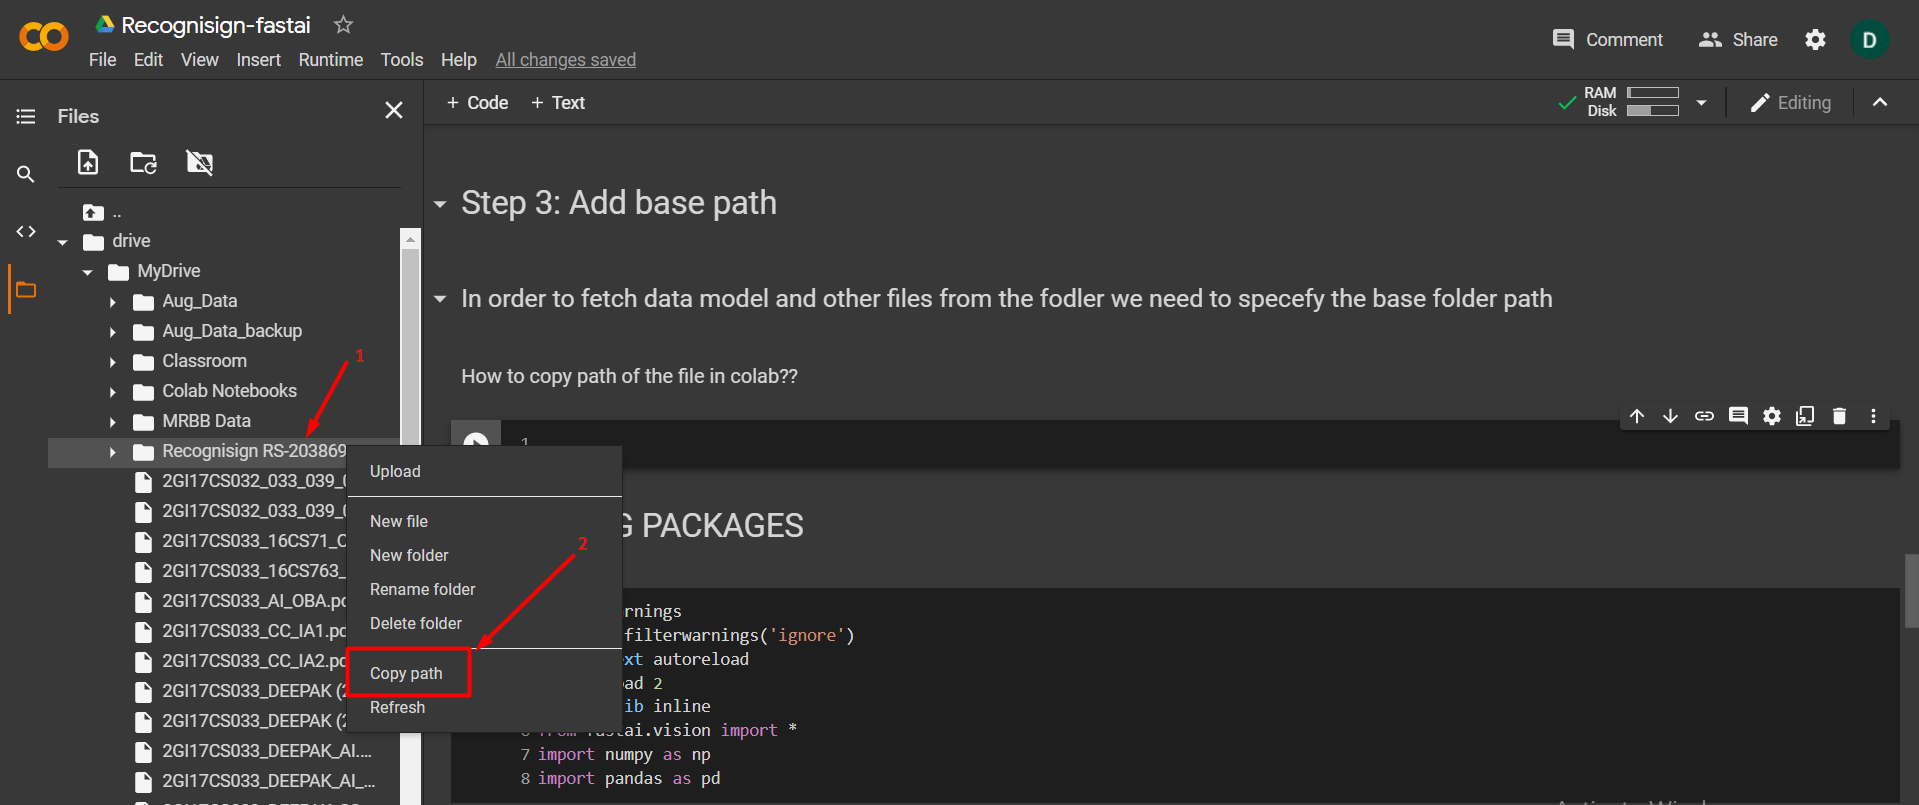

In [ ]:
# Run the below code and paste the copied path in the input.(refer the below image)
base = input()

/content/drive/MyDrive/Recognisign RS-203869


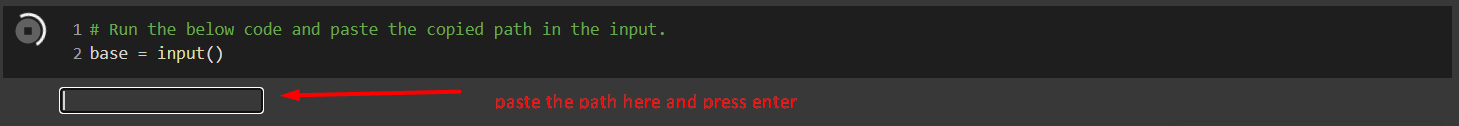

#IMPORTING PACKAGES

In [ ]:
import warnings
warnings.filterwarnings('ignore')
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai.vision import *
import numpy as np 
import pandas as pd
import shutil

#DATA SOURCE PATH

In [ ]:
# data folder path
path = base + '/Data'
ipa=base

#READING DATA FROM THE FOLDER

In [ ]:
# reading data
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train= '.', valid_pct=0.1,
                                  ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

# GETTING LEARNER

In [ ]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


Expected output of the above code

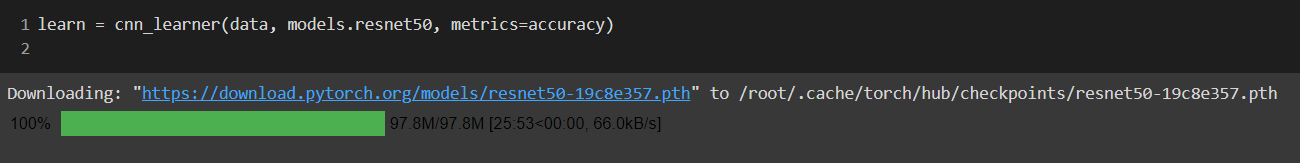

#TRAINING MODEL

In [ ]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,time


KeyboardInterrupt: ignored

Expected output of above model

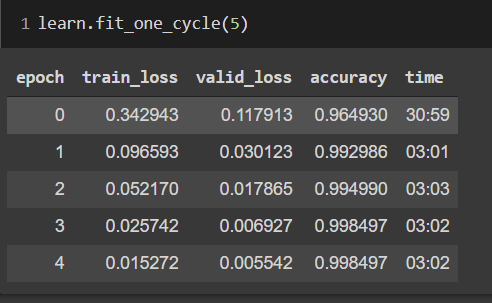

#SAVING MODEL

In [ ]:
learn.save(base + '/stage1')
learn.export()

Exception: ignored

In [ ]:
shutil.move(base + '/Data/export.pkl', base + '/export.pkl')

FileNotFoundError: ignored

#PREDECTING NEW SAMPLES

In [ ]:
#loading model "IMPORTANT"

learn = load_learner(base + '/models')


In [ ]:
# for single file testing

# BEFORE RUNNING THE PREDICTIONS CELLS MAKE SURE TO LEAD THE MODEL

from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  cat, tensor, probs = learn.predict(open_image(fn))
  print(f'Predicted class : {cat}')

In [ ]:
# for testing multiple images please upload the folder to the colab notebooks and then 
# enter the path below

# Please follow the above steps to upload the test images folder to colab
# Copy the path of the test images fodler and paste in the below code
image_path="/content/drive/MyDrive/Techfest Test Dataset (1)/"
# for root, dirs, files in os.walk(image_path):
#     print(dirs)
subdirs = [x[0] for x in os.walk(image_path)]
print(subdirs)
fhand = open("2.csv",'a')
with open('2.csv', 'a', newline='') as csvfile:
    spamwriter = csv.writer(csvfile, delimiter=' ',
                            quotechar=',', quoting=csv.QUOTE_MINIMAL)
    spamwriter.writerow([ 'label' , 'Probabiltiy' , 'Time'])
    for i in subdirs[1:]:
        print(i)
        image_path=i
        
    # if the path is the single image then predictions will be printed
        if not os.path.isdir(image_path):

            cat, tensor, probs = learn.predict(open_image(image_path))
            print(f' Predicted Class : {cat}')

        # if the image path is the folder the all the images will be predicted and the csv file will be generated
        # you can download the csv result file from the colab file panel in the left side

        elif os.path.isdir(image_path):

            print("{:<30}".format('Image Name'), end = ' : ')
            print("{:<30}".format('Predicted Class'))


            predictions = []
            import time
            tik=0
            start=time.time()
            for image in os.listdir(image_path):
                # print(image)
                tik+=1
                try:
                    cat, tensor, probs = learn.predict(open_image(image_path + '/' + image))
                # print(f' Predicted Class : {cat}')
                    print("{:<30}".format(image), end = ' : ')
                    print("{:<30}".format(str(cat)))
                    predictions.append([image,cat])
                except:
                    print(image,"nt found")
            end=time.time()
            print(end-start,tik)
            spamwriter.writerow([str(i)  , (tik*1.0/(end - start))])
            # pd.DataFrame(predictions, columns = ['Image Name', 'Predicted Class']).to_csv('/content' + '/Results.csv', index = None)
            print('Generated "results.csv" succesfully!!!')

['/content/drive/MyDrive/Techfest Test Dataset (1)/', '/content/drive/MyDrive/Techfest Test Dataset (1)/40', '/content/drive/MyDrive/Techfest Test Dataset (1)/28 - compulsory keep left', '/content/drive/MyDrive/Techfest Test Dataset (1)/29', '/content/drive/MyDrive/Techfest Test Dataset (1)/1', '/content/drive/MyDrive/Techfest Test Dataset (1)/72', '/content/drive/MyDrive/Techfest Test Dataset (1)/5', '/content/drive/MyDrive/Techfest Test Dataset (1)/13', '/content/drive/MyDrive/Techfest Test Dataset (1)/15', '/content/drive/MyDrive/Techfest Test Dataset (1)/14', '/content/drive/MyDrive/Techfest Test Dataset (1)/12 - Right Turn Prohibited', '/content/drive/MyDrive/Techfest Test Dataset (1)/16', '/content/drive/MyDrive/Techfest Test Dataset (1)/10', '/content/drive/MyDrive/Techfest Test Dataset (1)/18', '/content/drive/MyDrive/Techfest Test Dataset (1)/17', '/content/drive/MyDrive/Techfest Test Dataset (1)/11 - Pederstrians Prohibited', '/content/drive/MyDrive/Techfest Test Dataset (1)/

### How to download the result file?? (only for bulk testing i.e. uploading test folder and testing the predictions, for individual image testing the results will be displayed below the cell itself.)

The file will be downloaded in the same project folder, right click on the results.csv file and cl;ick download (refer below image)

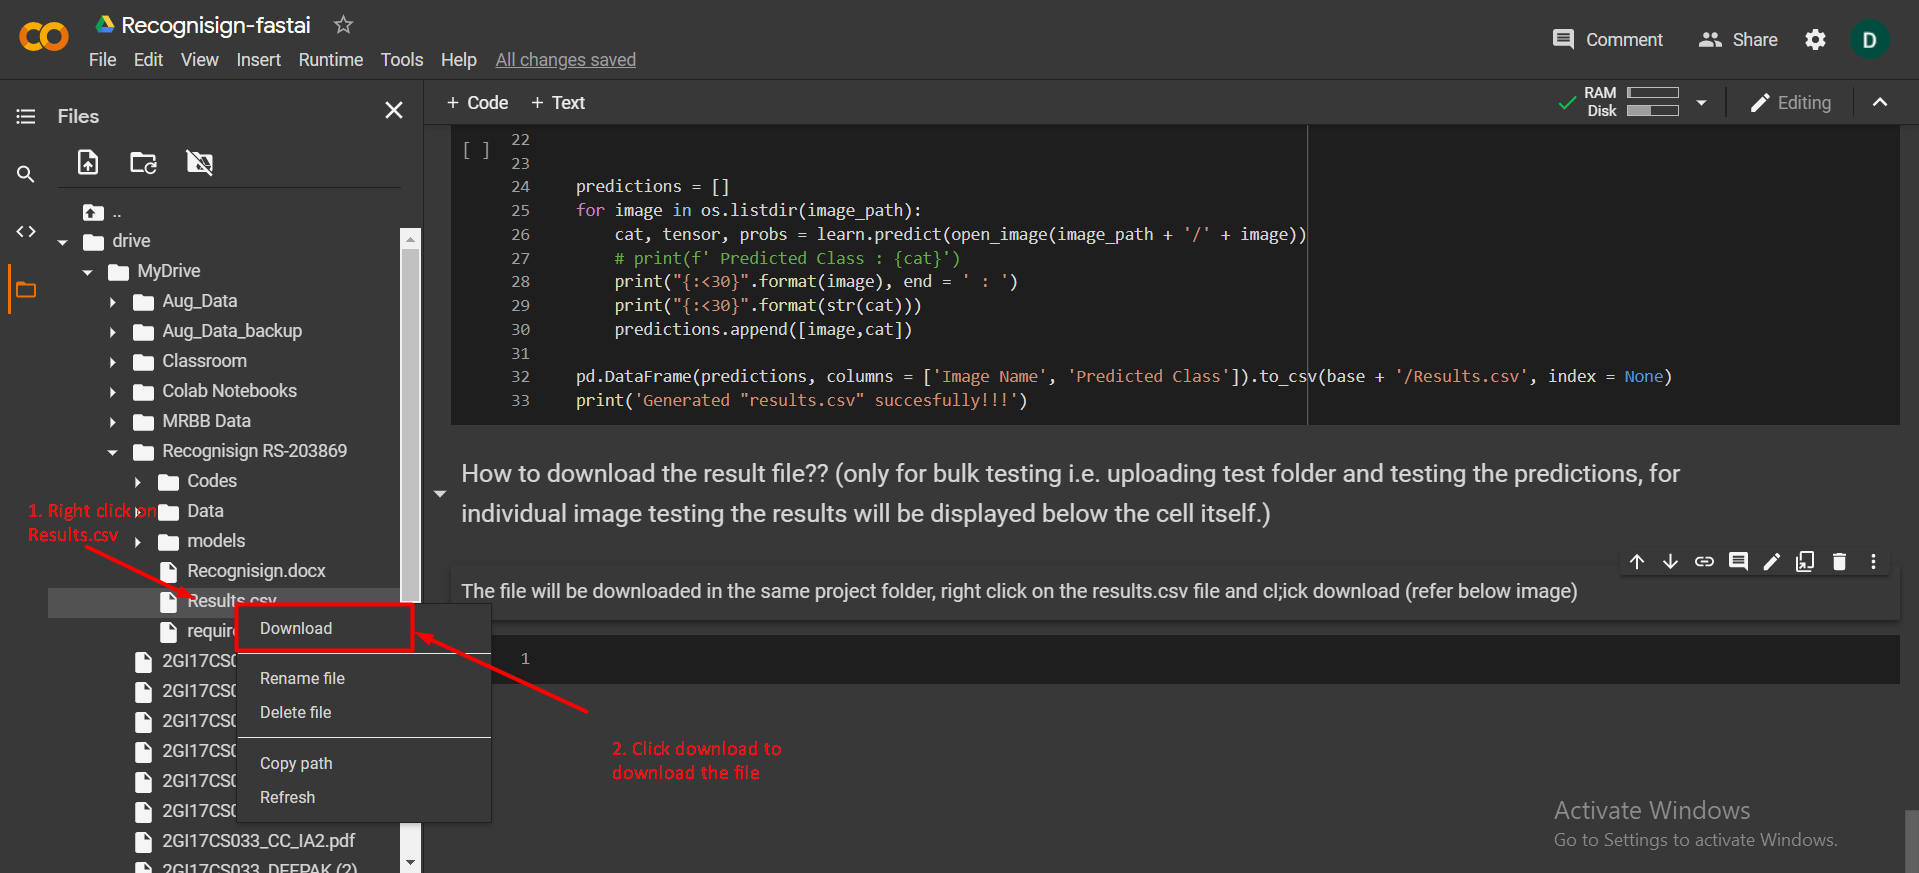

### METHOD 2 (EXTRA OPTIONAL)

As we did not find the real tiome images of most of the classes in good number, I decided to use sliding window technique to predict the class of the image even if the sign in the image is small. Refer below image for more clarification

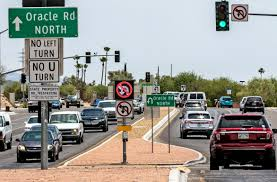

The U turn symbol in this image is very small, so with the sliding window technique we can consider a small cropped section of the image and classify it and then we slide the cropped section towards right and then classify the image again. Repeating this tep for the entire image will give us the final output. (This emthod is not preffered because it is time consuming as we have to iterate through the single image)

Here is my linkedin article on this technique: https://lnkd.in/gzjt4fQ

# CODE FOR SLIDING WINDOW TECHNIQUE 

This method require more time for classifying images.

In [ ]:
# import the necessary packages
import imutils

def sliding_window(image, step, ws):
	# slide a window across the image
	for y in range(0, image.shape[0] - ws[1], step):
		for x in range(0, image.shape[1] - ws[0], step):
			# yield the current window
			yield (x, y, image[y:y + ws[1], x:x + ws[0]])

def image_pyramid(image, scale=1.5, minSize=(224, 224)):
	# yield the original image
	yield image

	# keep looping over the image pyramid
	while True:
		# compute the dimensions of the next image in the pyramid
		w = int(image.shape[1] / scale)
		image = imutils.resize(image, width=w)

		# if the resized image does not meet the supplied minimum
		# size, then stop constructing the pyramid
		if image.shape[0] < minSize[1] or image.shape[1] < minSize[0]:
			break

		# yield the next image in the pyramid
		yield image

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications import imagenet_utils
from imutils.object_detection import non_max_suppression
# from pyimagesearch.detection_helpers import sliding_window
# from pyimagesearch.detection_helpers import image_pyramid
import numpy as np
import argparse
import imutils
import time
import cv2

In [ ]:
WIDTH = 600
PYR_SCALE = 1.5
WIN_STEP = 16
ROI_SIZE = (200, 150) #eval(args["size"])
INPUT_SIZE = (224, 224)

In [ ]:
image_path="path-to-the-test-images-folder"

In [ ]:
predictions2 = []
for image in os.listdir(image_path):


    orig = cv2.imread(image_path + '/' + image)
    orig = imutils.resize(orig, width=WIDTH)
    (H, W) = orig.shape[:2]

    pyramid = image_pyramid(orig, scale=PYR_SCALE, minSize=ROI_SIZE)

    rois = []
    locs = []


    # loop over the image pyramid
    for image in pyramid:
        # determine the scale factor between the *original* image
        # dimensions and the *current* layer of the pyramid
        scale = W / float(image.shape[1])

        # for each layer of the image pyramid, loop over the sliding
        # window locations
        for (x, y, roiOrig) in sliding_window(image, WIN_STEP, ROI_SIZE):
            # scale the (x, y)-coordinates of the ROI with respect to the
            # *original* image dimensions
            x = int(x * scale)
            y = int(y * scale)
            w = int(ROI_SIZE[0] * scale)
            h = int(ROI_SIZE[1] * scale)

            # take the ROI and pre-process it so we can later classify
            # the region using Keras/TensorFlow
            roi = cv2.resize(roiOrig, INPUT_SIZE)
            roi = img_to_array(roi)
            roi = preprocess_input(roi)

            # update our list of ROIs and associated coordinates
            rois.append(roi)
            locs.append((x, y, x + w, y + h))

            # check to see if we are visualizing each of the sliding
            # windows in the image pyramid
            if -1 > 0:
                # clone the original image and then draw a bounding box
                # surrounding the current region
                clone = orig.copy()
                cv2.rectangle(clone, (x, y), (x + w, y + h),
                    (0, 255, 0), 2)

                # show the visualization and current ROI
                cv2.imshow("Visualization", clone)
                cv2.imshow("ROI", roiOrig)
                cv2.waitKey(0)

    image_path="test.jpg"
    sets =[]
    l =[]
    for i in rois:
        cv2.imwrite('test.jpg',i)
        cat, tensor, probs = learn.predict(open_image(image_path))
        sets.append([str(cat), float(probs[np.argmax(probs)])])
    test = list(sets)
    for i in test:
        if i[1] < 0.9:
            sets.remove(i)
    proba = {}
    for i in sets:
        if i[0] in proba:
            proba[i[0]] += 1
        elif i[0] not in proba:
            proba[i[0]] = 1

    a = list(proba.items())
    a.sort(key =lambda x:x[1])
    cls = a[-1][0]
    predictions2.append([image, cls])
    # print(f'Predictions : {a[-1][0]}')    

pd.DataFrame(predictions, columns = ['Image Name', 'Predicted Class']).to_csv(base + '/Results.csv', index = None)
print('Generated "results.csv" succesfully!!!')